## Choix des paramètres

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [27]:
dataset = pd.read_csv("chansons.csv")
dataset.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [28]:
X = dataset[['duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
y = dataset['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
dataset.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [30]:
dataset.loc[:,'popularity'].describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

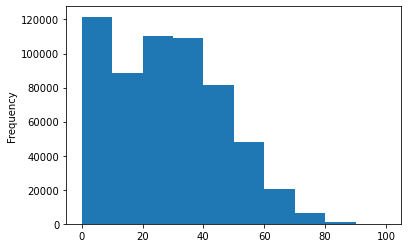

In [31]:
dataset.loc[:,'popularity'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

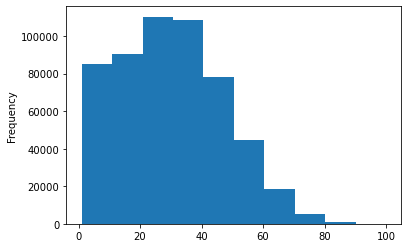

In [32]:
dataset = dataset[dataset.popularity != 0]
dataset.loc[:,'popularity'].plot.hist()

In [33]:
dataset = dataset[dataset.duration_ms < 1000000]
dataset = dataset[dataset.tempo != 0]

In [34]:
y[y < 90]=0
y[y >= 90]=1
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9998892061192313

In [37]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrix

array([[117322,      0],
       [    13,      0]], dtype=int64)

In [ ]:
accuracy_array = np.array([0.1])

for i in range(12000):
    y_pred = classifier.predict_proba(X_test)[:,1]
    y_pred [y_pred >= (i/10000)]=0
    y_pred [y_pred < (i/10000)]=1
    cm = confusion_matrix(y_test, y_pred).ravel()
    accuracy = cm[3]/cm[3]+cm[1]*100
    accuracy_array = np.insert(accuracy_array, i , [accuracy],axis = 0)
pd.DataFrame(accuracy_array).plot.line()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_9596\340497007.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  accuracy = cm[3]/cm[3]+cm[1]*100


In [42]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
75631,0,1.0
323365,0,1.0
200980,0,1.0
518638,0,1.0
515311,0,1.0
...,...,...
389147,0,1.0
258347,0,1.0
164626,0,1.0
306829,0,1.0
